# Exploratory Data Analysis for Amazon Time‑Series Dataset
This notebook performs a thorough exploratory data analysis (EDA) of a time‑series dataset that combines Amazon stock prices with Reddit and news sentiment metrics. The objectives are:
1. Understand the structure and quality of the dataset.
2. Explore temporal patterns in price, volume, and sentiment.
3. Identify relationships between sentiment and market performance.
4. Surface any anomalies, trends, or seasonality that may inform downstream modeling.

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Stats / TS analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot, autocorrelation_plot

# Config
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
sns.set_style('whitegrid')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [2]:
DATA_PATH = '../../data/merged-data/amazon-merged.csv'

In [3]:
data = pd.read_csv(DATA_PATH)
print(f'Shape: {data.shape}')
data.head()

Shape: (316, 16)


,Date,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score
0,2025-01-02,222.0300,225.1500,218.1900,220.2200,"33,956,600.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-03,222.5100,225.3600,221.6200,224.1900,"27,515,600.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-06,226.7800,228.8400,224.8400,227.6100,"31,849,800.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-07,227.9000,228.3800,221.4600,222.1100,"28,084,200.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-08,223.1900,223.5200,220.2000,222.1300,"25,033,300.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               316 non-null    object 
 1   Open               316 non-null    float64
 2   High               316 non-null    float64
 3   Low                316 non-null    float64
 4   Close              316 non-null    float64
 5   Volume             316 non-null    float64
 6   author             143 non-null    object 
 7   score              143 non-null    float64
 8   subreddit          143 non-null    object 
 9   tickers_mentioned  316 non-null    object 
 10  clean_text         143 non-null    object 
 11  compound           143 non-null    float64
 12  sentiment          143 non-null    object 
 13  cleaned_headline   229 non-null    object 
 14  sentiment_news     229 non-null    object 
 15  sentiment_score    229 non-null    float64
dtypes: float64(8), object(8)
m

None

In [5]:
display(data.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,316,102,2025-05-13,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,316.0000,NaN,NaN,NaN,203.6782,13.3158,162.0000,193.3800,205.9200,211.0800,239.0200
High,316.0000,NaN,NaN,NaN,206.2301,12.5287,169.6000,194.6900,206.8500,212.8000,242.5200
Low,316.0000,NaN,NaN,NaN,201.3824,13.3176,161.3800,191.1600,202.6700,208.8500,238.0300
Close,316.0000,NaN,NaN,NaN,203.9145,12.7234,167.3200,193.0600,205.1700,210.2500,242.0600
Volume,316.0000,NaN,NaN,NaN,"44,987,379.7468","13,461,794.2160","23,713,700.0000","37,167,300.0000","43,318,500.0000","53,760,125.0000","123,159,400.0000"
author,143,12,caughtinrain,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,143.0000,NaN,NaN,NaN,24.1189,50.3385,0.0000,9.0000,10.0000,16.0000,258.0000
subreddit,143,3,investing,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tickers_mentioned,316,1,AMZN,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').set_index('Date')

In [7]:
# Forward fill numeric columns if small gaps, else leave for modeling
data[['Open','High','Low','Close','Volume']] = data[['Open','High','Low','Close','Volume']].ffill()

In [8]:
# Create a daily return column
data['Return'] = data['Close'].pct_change()

In [9]:
missing_after = data.isna().sum().sort_values(ascending=False)
print('Missing after preprocessing:')
display(missing_after[missing_after > 0])

Missing after preprocessing:


author              173
score               173
subreddit           173
clean_text          173
compound            173
sentiment           173
cleaned_headline     87
sentiment_news       87
sentiment_score      87
Return                1
dtype: int64

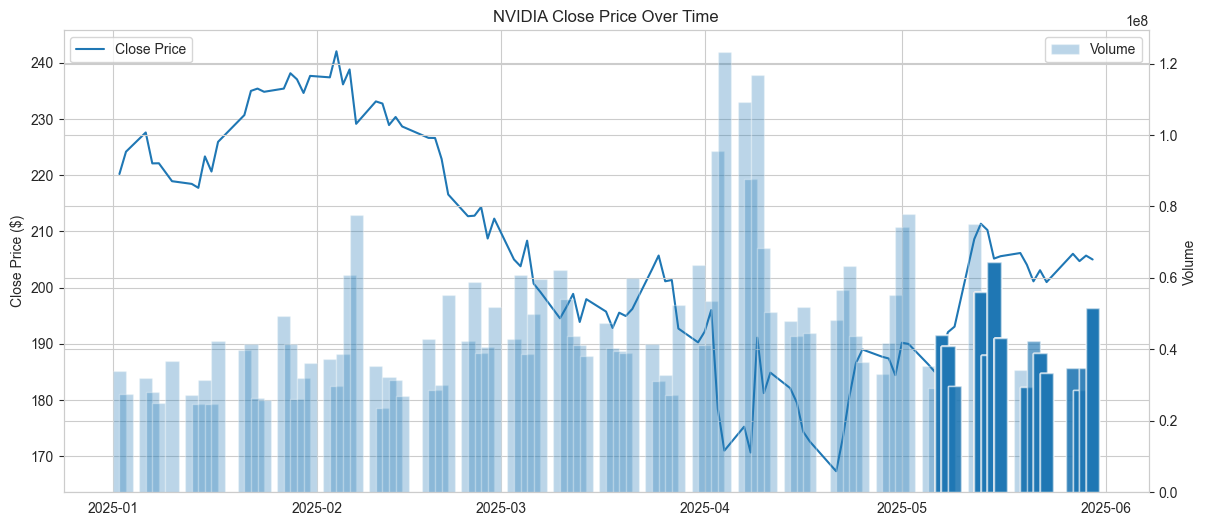

In [10]:
fig, ax1 = plt.subplots(figsize = (14,6))
ax1.plot(data.index, data['Close'], label = 'Close Price')
ax1.set_ylabel('Close Price ($)')
ax1.set_title('NVIDIA Close Price Over Time')
ax1.legend(loc = 'upper left')

# Secondary axis for volume
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha = 0.3, label = 'Volume', width = 2)
ax2.set_ylabel('Volume')
ax2.legend(loc = 'upper right')
plt.show()

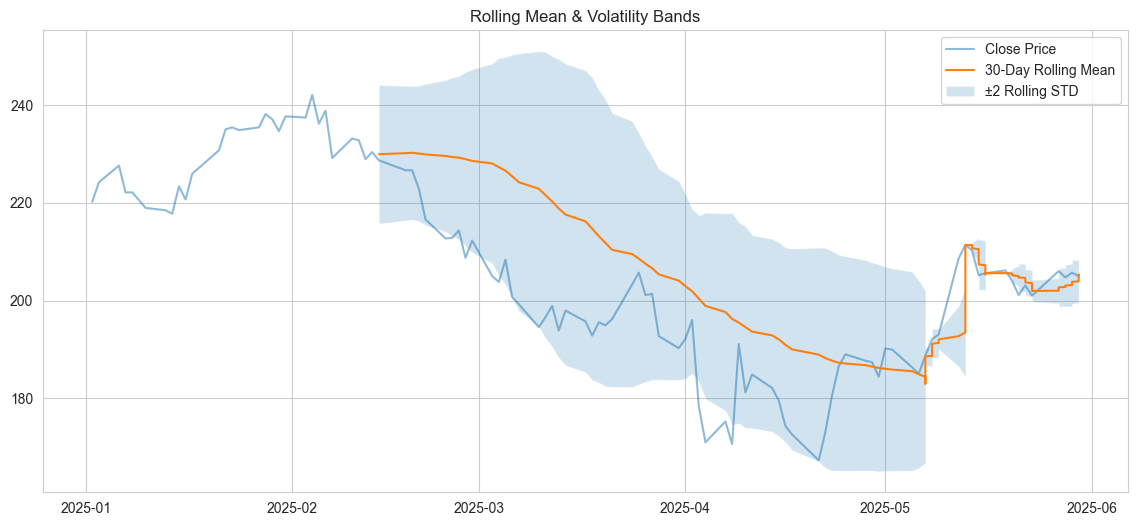

In [11]:
window = 30  # 30 trading days ~ 1.5 months
rolling_mean = data['Close'].rolling(window).mean()
rolling_std = data['Close'].rolling(window).std()

plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(rolling_mean, label=f'{window}-Day Rolling Mean')
plt.fill_between(data.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, alpha=0.2, label='±2 Rolling STD')
plt.title('Rolling Mean & Volatility Bands')
plt.legend()
plt.show()

In [12]:
data

,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score,Return
Date,,,,,,,,,,,,,,,,
2025-01-02,222.0300,225.1500,218.1900,220.2200,"33,956,600.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,222.5100,225.3600,221.6200,224.1900,"27,515,600.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,0.0180
2025-01-06,226.7800,228.8400,224.8400,227.6100,"31,849,800.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,0.0153
2025-01-07,227.9000,228.3800,221.4600,222.1100,"28,084,200.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0242
2025-01-08,223.1900,223.5200,220.2000,222.1300,"25,033,300.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,204.8400,205.9900,201.7000,205.0100,"51,679,400.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,new york times agrees to license content to am...,neutral,0.5237,0.0000
2025-05-30,204.8400,205.9900,201.7000,205.0100,"51,679,400.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,c3ai eyes 47 billion agentic ai market by 2030...,positive,0.7274,0.0000
2025-05-30,204.8400,205.9900,201.7000,205.0100,"51,679,400.0000",NaN,NaN,NaN,AMZN,NaN,NaN,NaN,investors double down on taco trade after tari...,negative,0.9437,0.0000


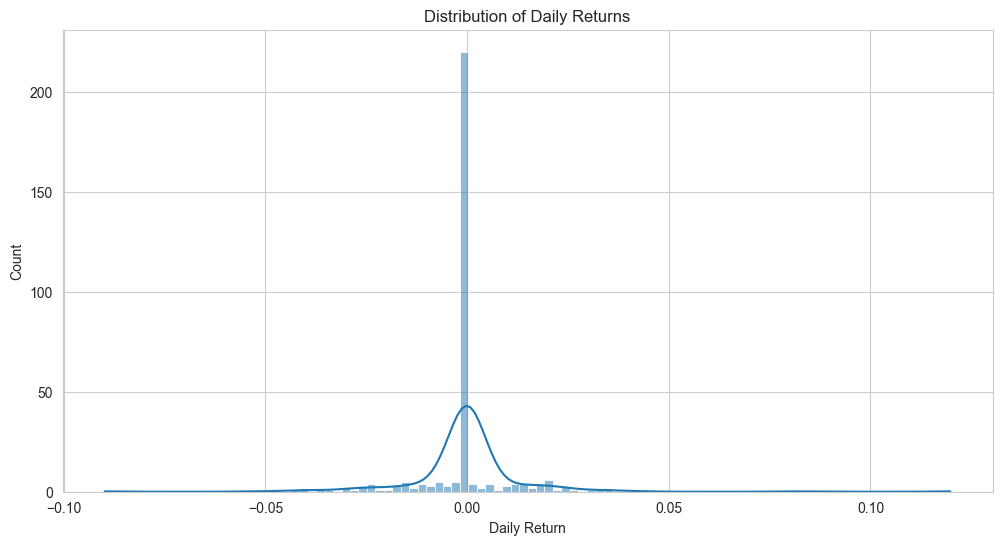

count   315.0000
mean     -0.0001
std       0.0145
min      -0.0898
1%       -0.0414
5%       -0.0238
25%       0.0000
50%       0.0000
75%       0.0000
95%       0.0200
99%       0.0358
max       0.1198
Name: Return, dtype: float64

In [13]:
sns.histplot(data['Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# Tail analysis
data['Return'].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])

In [14]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = dict(zip(labels, result[:4]))
    for key, value in out.items():
        print(f'{key}: {value}')
    for key, val in result[4].items():
        print(f'Critical Value {key}: {val}')
    print('---')

adf_test(data['Close'], 'Close Price')
adf_test(data['Return'], 'Return')

Augmented Dickey-Fuller Test: Close Price
ADF Statistic: -3.379796623659301
p-value: 0.011667189630366982
# Lags Used: 15
Number of Observations Used: 300
Critical Value 1%: -3.4523371197407404
Critical Value 5%: -2.871222860740741
Critical Value 10%: -2.571929211111111
---
Augmented Dickey-Fuller Test: Return
ADF Statistic: -4.4073889832220425
p-value: 0.00028802140166461185
# Lags Used: 16
Number of Observations Used: 298
Critical Value 1%: -3.4524859843440754
Critical Value 5%: -2.871288184343229
Critical Value 10%: -2.571964047565425
---


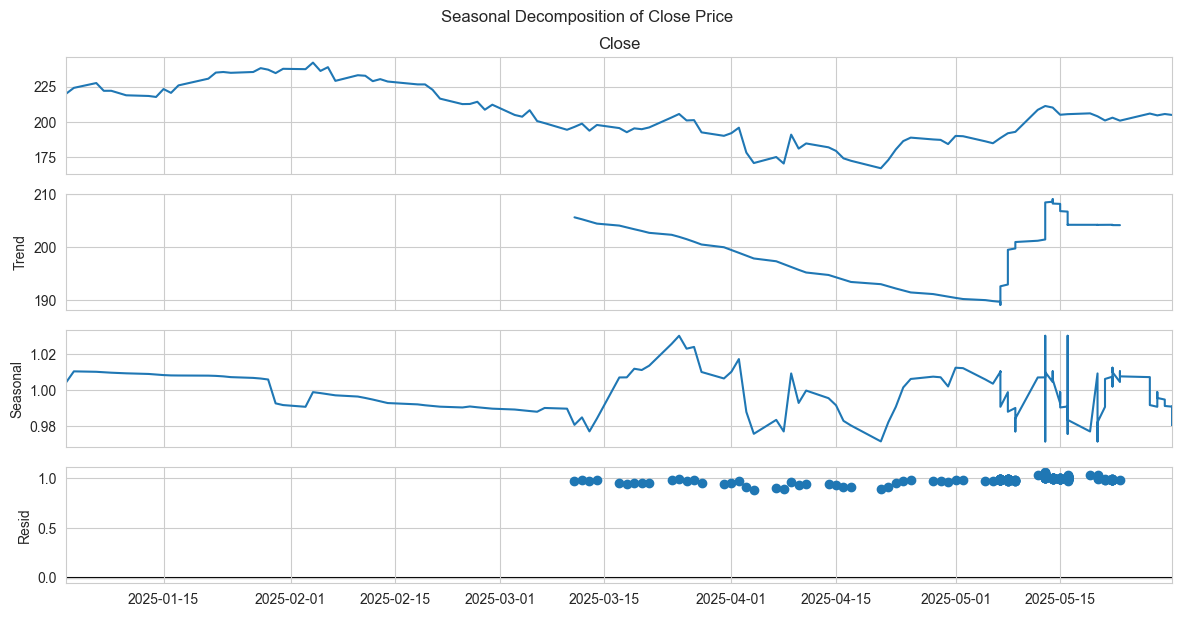

In [16]:
# Decompose with multiplicative model (price often multiplicative)
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=90)  

decomposition.plot()
plt.suptitle('Seasonal Decomposition of Close Price', y=1.02)
plt.show()

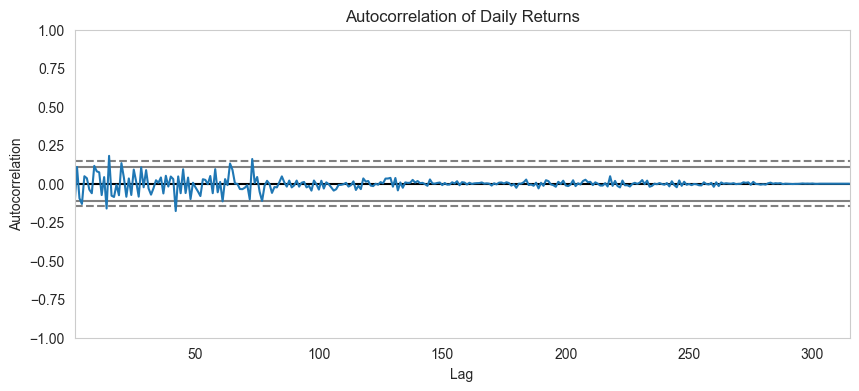

In [17]:
plt.figure(figsize=(10,4))
autocorrelation_plot(data['Return'].dropna())
plt.title('Autocorrelation of Daily Returns')
plt.show()

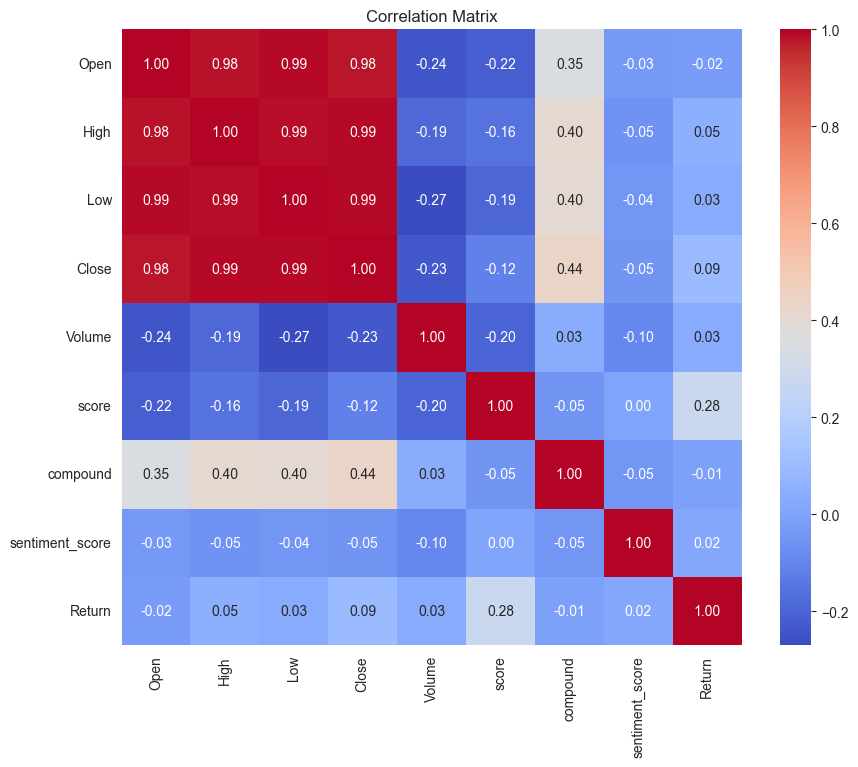

In [18]:
# Select numeric columns for correlation
num_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# How many duplicates do I have?
dupes = data.index.duplicated(keep=False).sum()
print(f"Duplicate index rows: {dupes}")

# Quickly inspect a few of them
print(data.index[data.index.duplicated()].unique()[:10])


Duplicate index rows: 229
DatetimeIndex(['2025-05-07', '2025-05-08', '2025-05-09', '2025-05-13',
               '2025-05-14', '2025-05-15', '2025-05-16', '2025-05-20',
               '2025-05-21', '2025-05-22'],
              dtype='datetime64[ns]', name='Date', freq=None)


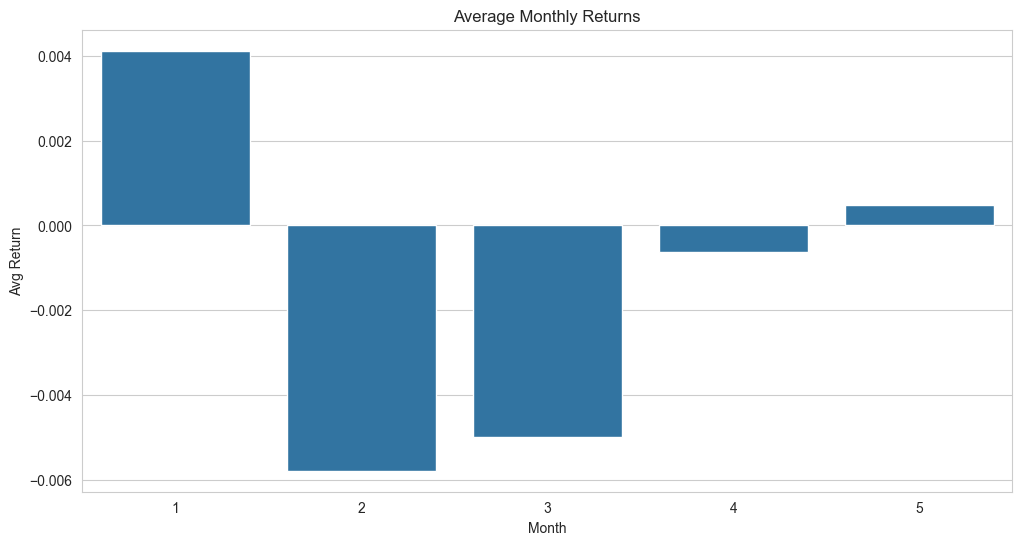

In [20]:
# Monthly seasonality
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')['Return'].mean()

sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Avg Return')
plt.show()

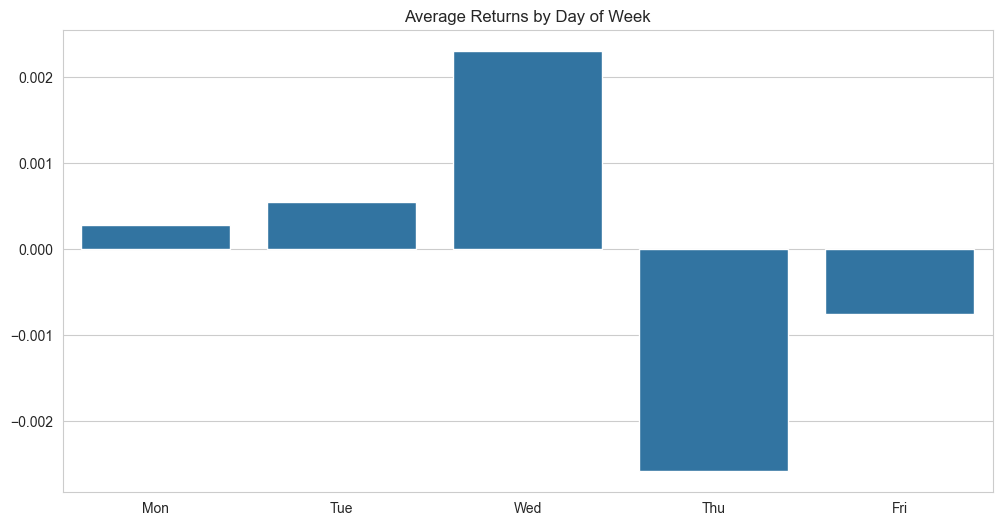

In [21]:
# Day of week effect
data['DayOfWeek'] = data.index.dayofweek  # 0=Monday
dow_avg = data.groupby('DayOfWeek')['Return'].mean()

sns.barplot(x=['Mon','Tue','Wed','Thu','Fri'], y=dow_avg.values)
plt.title('Average Returns by Day of Week')
plt.show()